<a href="https://colab.research.google.com/github/waghvaishnav/Unsupervised-Machine-Learning-Algorithms-and-Techniques-Lab-/blob/main/Hierarchical_Clustering%20(agglomerative)with%20sklearn/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering (agglomerative) with scikit-learn :

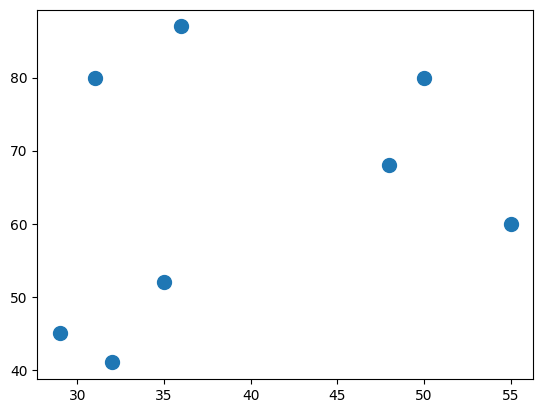

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = {"names":["vaishnav","ravi","mayur","vaibhav","pratik","suresh","akash","pravin"],
        "age" : [29,50,35,32,36,48,31,55],
        "income": [45,80,52,41,87,68,80,60]
        }
df = pd.DataFrame(data)

plt.scatter(df['age'],df['income'],s=100)

In [ ]:
ac = AgglomerativeClustering(n_clusters=3,linkage="ward")
ac.fit(df[['age',"income"]])

df["clusters"] = ac.labels_

In [ ]:
ac.labels_

array([1, 0, 1, 1, 2, 0, 2, 0])

In [ ]:
df

,names,age,income,clusters
0,vaishnav,29,45,1
1,ravi,50,80,0
2,mayur,35,52,1
3,vaibhav,32,41,1
4,pratik,36,87,2
5,suresh,48,68,0
6,akash,31,80,2
7,pravin,55,60,0


<Axes: xlabel='age', ylabel='income'>

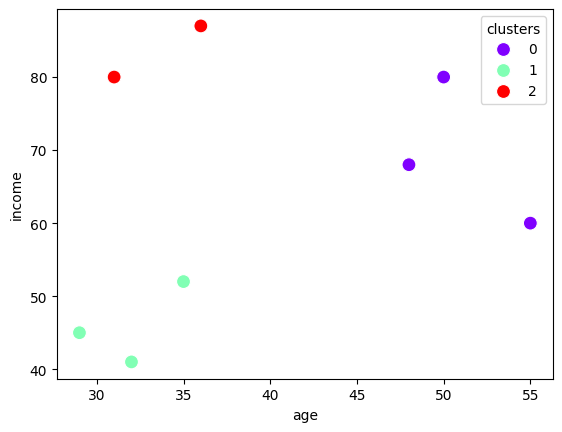

In [ ]:
import seaborn as sns
sns.scatterplot(
    x="age",
    y="income",
    hue="clusters",
    palette="rainbow",
    data=df,
    s=100
)

# Hierarchical Clustering (agglomerative) with scipy :

[[ 0.          3.          5.          2.        ]
 [ 4.          6.          8.60232527  2.        ]
 [ 5.          7.         10.63014581  2.        ]
 [ 2.          8.         11.61895004  3.        ]
 [ 1.         10.         18.55622088  3.        ]
 [ 9.         12.         34.88074923  5.        ]
 [11.         13.         60.77622891  8.        ]]


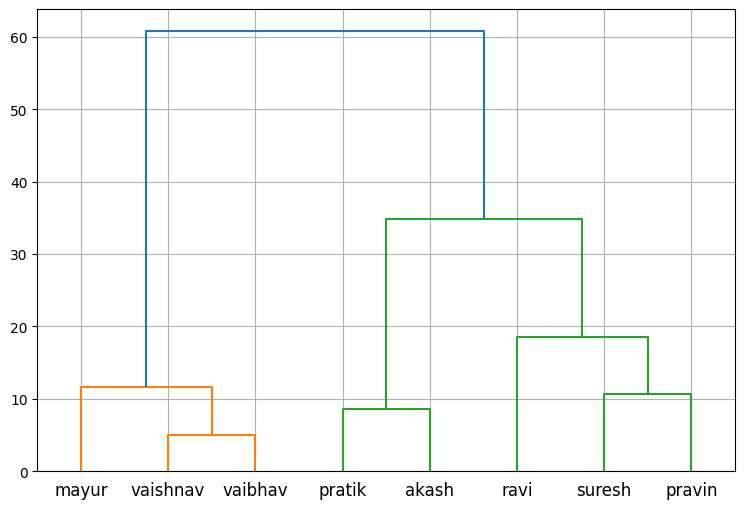

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
x= df[['age',"income"]]
link = linkage(df[['age',"income"]],method="ward")
print(link)
plt.figure(figsize=(9,6))
dendrogram(link,labels=df["names"].values)
plt.grid()

In [ ]:
result = fcluster(link, t=10, criterion='distance')
df["scipy_clusters"] = result

In [ ]:
df

,names,age,income,clusters,scipy_clusters
0,vaishnav,29,45,1,1
1,ravi,50,80,0,6
2,mayur,35,52,1,2
3,vaibhav,32,41,1,1
4,pratik,36,87,2,3
5,suresh,48,68,0,4
6,akash,31,80,2,3
7,pravin,55,60,0,5


<Axes: xlabel='age', ylabel='income'>

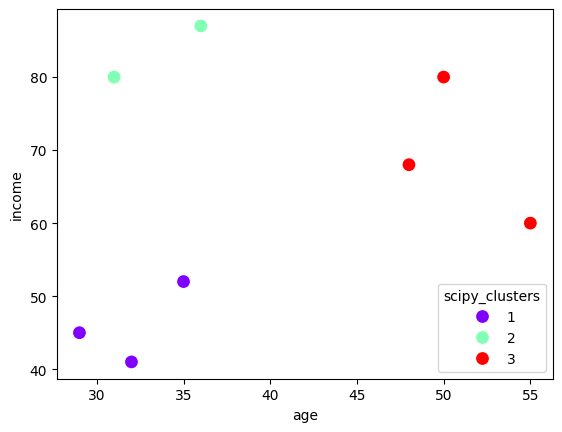

In [ ]:
sns.scatterplot(
    x="age",
    y="income",
    hue="scipy_clusters",
    palette="rainbow",
    data=df,
    s=100
)